In [14]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [15]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TOPIC AND SENTIMENT INTENSITY + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 4 (Fixed Set Test).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,...,18,20,0,32,0,8,98.4,53.3,109,Train
2008-01-02,411032,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,...,10,19,5,39,7,5,90.8,53.0,108,Train
2008-01-03,414332,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,...,38,28,6,30,0,0,89.5,53.4,106,Train
2008-01-04,395900,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,...,25,22,8,45,0,8,82.6,56.4,106,Train
2008-01-05,366387,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,...,16,22,5,47,0,9,79.8,57.2,106,Train


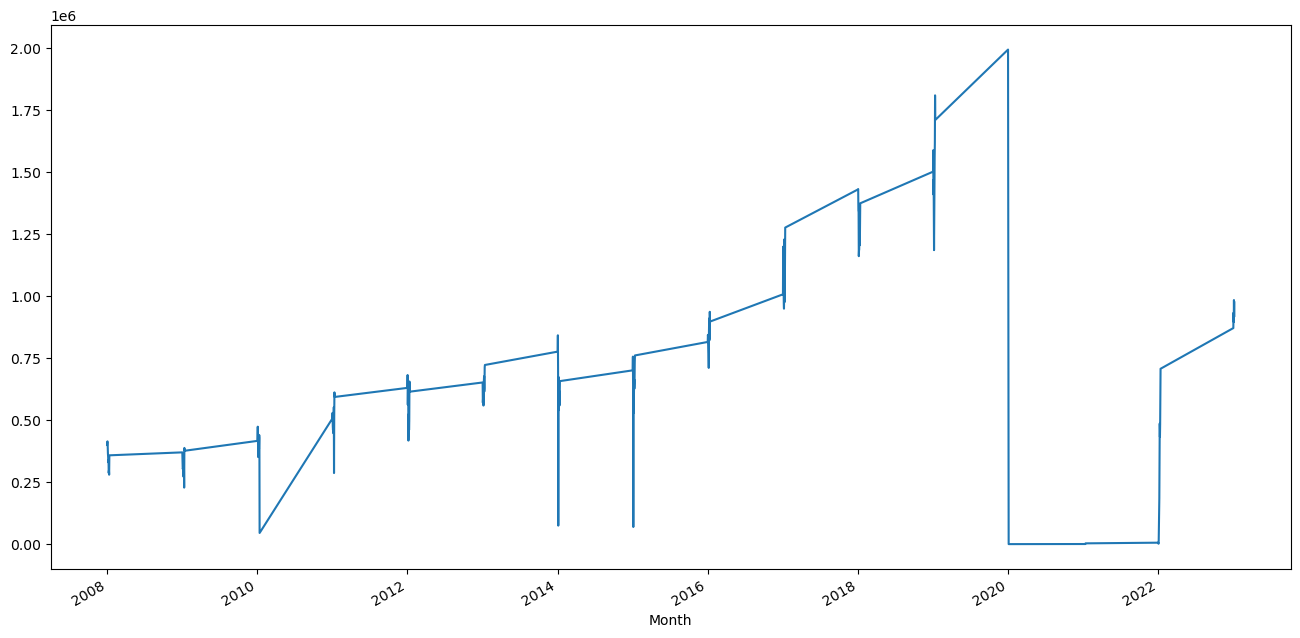

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [17]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  NegativityQDAP  PositivityQDAP   TOPIC 1  \
Month                                                                   
2008-01-01           399556        0.181818        0.090909  0.008715   
2008-01-02           411032        0.000000        0.090909  0.009085   
2008-01-03           414332        0.142857        0.000000  0.008164   
2008-01-04           395900        0.214286        0.071429  0.007528   
2008-01-05           366387        0.000000        0.100000  0.008862   
...                     ...             ...             ...       ...   
2023-01-02           932969        0.000000        0.181818  0.014135   
2023-01-03           895425        0.000000        0.142857  0.007677   
2023-01-04           984146        0.000000        0.222222  0.014135   
2023-01-05           916257        0.000000        0.125000  0.014135   
2023-01-06           975010        0.000000        0.111111  0.012180   

             TOPIC 2   TOPIC 3   TOPIC 4   TOPIC 5

In [18]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5062.559, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5058.682, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5059.447, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5059.222, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5056.726, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5057.622, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5057.310, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5058.795, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5060.456, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5060.497, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5062.493, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.771 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [19]:
train = df1['Tourist Arrival'][:'01/01/2021'].dropna()
test = df1['Tourist Arrival']['01/04/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/01/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/04/2019':].dropna()

In [20]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(0,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           35     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49468D+01    |proj g|=  6.56181D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   35      0      1      0     0     0   6.562D-07   1.495D+01
  F =   14.946753715582609     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Tourist Arrival   No. Observations:                  157
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2346.640
Date:                Wed, 23 Aug 2023   AIC                           4763.281
Time:                        22:25:57   BIC                           4869.801
Sample:                             0   HQIC                          4806.547
                                - 157                                         
Covariance Type:                  opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
NegativityQDAP           1.815e+05   1.77e+07      0.010      0.992   -3.45e+07    3.49e+07
PositivityQDAP            2.19e+05   2.25e+07      0.010      0.992   -4.39e+07    4.43e+07
TOPIC 1                 -1.172e+05   1.44e+07     -0.008      0.994   -2.84e+07    2.82e+07
TOPIC 2                   -1.2e+05   9.46e+06     -0.013      0.990   -1.87e+07    1.84e+07
TOPIC 3                 -2.606e+04   1.05e+07     -0.002      0.998   -2.06e+07    2.06e+07
TOPIC 4                 -5.348e+04    6.8e+06     -0.008      0.994   -1.34e+07    1.33e+07
TOPIC 5                  1.911e+04   7.62e+06      0.003      0.998   -1.49e+07    1.49e+07
TOPIC 6                 -1.879e+04   2.36e+07     -0.001      0.999   -4.63e+07    4.62e+07
TOPIC 7                 -5.475e+04   7.79e+06     -0.007      0.994   -1.53e+07    1.52e+07
TOPIC 8                 -3.809e+04   7.24e+06     -0.005      0.996   -1.42e+07    1.42e+07
TOPIC 9                 -8.395e+04   6.57e+06     -0.013      0.990    -1.3e+07    1.28e+07
TOPIC 10                  -4.7e+04   1.03e+07     -0.005      0.996   -2.02e+07    2.01e+07
Airbnb Vietnam          -1142.1941   3.25e+05     -0.004      0.997   -6.38e+05    6.36e+05
Vietnam restaurant       2309.2646   4.17e+05      0.006      0.996   -8.15e+05     8.2e+05
Shopping in Hanoi        1079.9854   4.59e+05      0.002      0.998   -8.99e+05    9.01e+05
Shopping in Ho Chi Minh  1918.4106   4.86e+05      0.004      0.997   -9.51e+05    9.55e+05
 Vietnam tour            -439.5167   6.34e+05     -0.001      0.999   -1.24e+06    1.24e+06
 Skyscanner              4541.8392    5.6e+05      0.008      0.994   -1.09e+06     1.1e+06
 Vietnam visa            4430.0092   6.28e+05      0.007      0.994   -1.23e+06    1.24e+06
 Vietnam airport         1487.5206   5.59e+05      0.003      0.998   -1.09e+06     1.1e+06
 Vietnam flights        -3677.6335   5.05e+05     -0.007      0.994   -9.94e+05    9.86e+05
 Danang airport          -507.5942   2.65e+05     -0.002      0.998    -5.2e+05    5.19e+05
 Hoi An                 -1987.7381   3.09e+05     -0.006      0.995   -6.08e+05    6.04e+05
 Vietnam weather          840.2272    3.2e+05      0.003      0.998   -6.27e+05    6.29e+05
 Visa for Vietnam        3974.8701   6.55e+05      0.006      0.995   -1.28e+06    1.29e+06
 Sgn airport              895.4177   3.57e+05      0.003      0.998   -6.99e+05    7.01e+05
 Phu Quoc                3920.2468   3.25e+05      0.012      0.990   -6.33e+05    6.41e+05
 Vietnam itinerary       -641.2388   4.14e+05     -0.002      0.999   -8.11e+05     8.1e+05
 Vietnam trip            5227.9365   4.04e+05      0.013      0.990   -7.86e+05    7.97e+05
 Things to do in Hue     3587.4244   4.73e+05      0.008      0.994   -9.23e+05     9.3e+05
 Vietnam backpackers    -4551.5083   5.42e+05     -0.008      0.993   -1.07e+06    1.06e+06
CCI                      -313.1380   6.36e+05     -0.000      1.000   -1.25e+06    1.25e+06
PMI                  

In [21]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 450179.33832222916


In [24]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 389149.84927381366


In [25]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 4.7515057279769575e+20


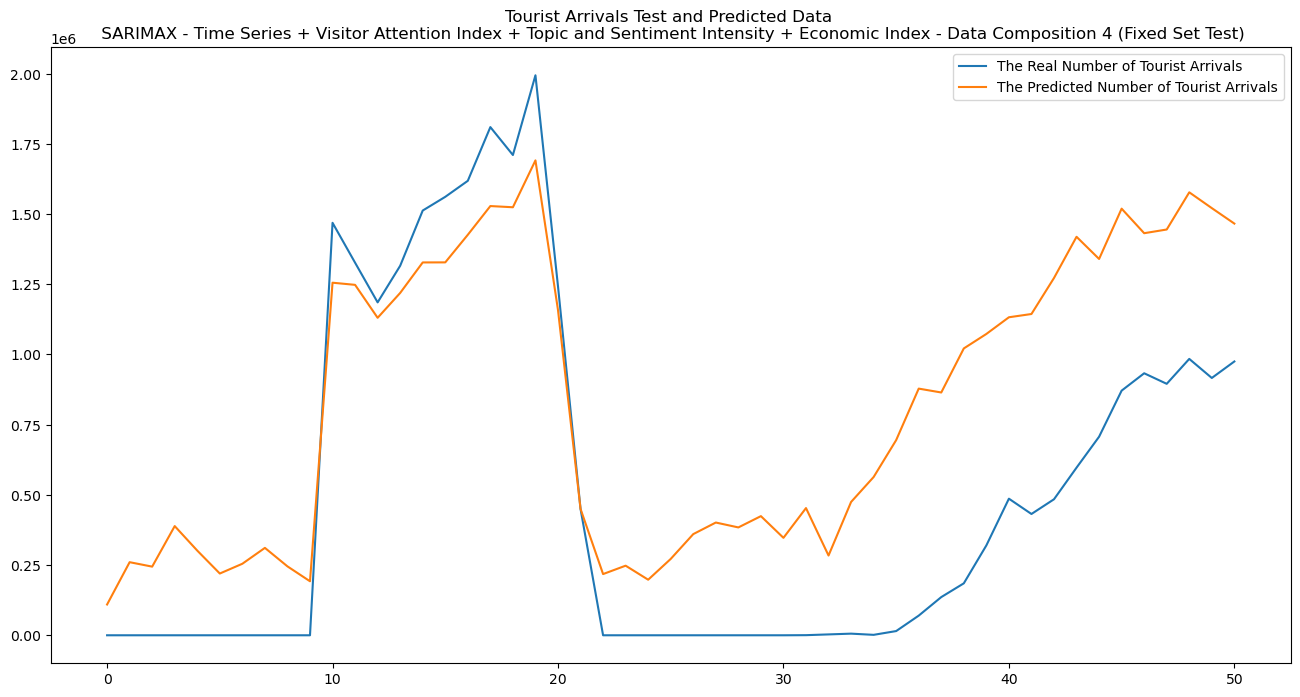

In [26]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index + Topic and Sentiment Intensity + Economic Index - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()